# Split the data

## Set up

In [10]:
import sys
sys.path.append("..")
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src.data import load_data, split_data
from src.visualization import visualize

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option("display.max_columns", None)

np.random.seed(42)

In [2]:
housing = load_data.load_housing_data()

In [3]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

### Straified Sampling
Split median income into strata.  Ensure each strata has a sufficient number of instances included to avoid introducing bias

<AxesSubplot: >

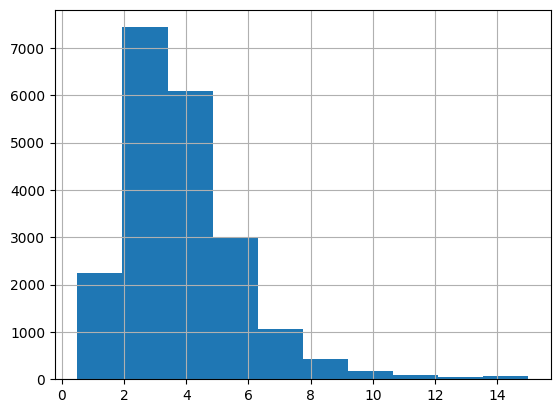

In [4]:
housing["median_income"].hist()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot: >

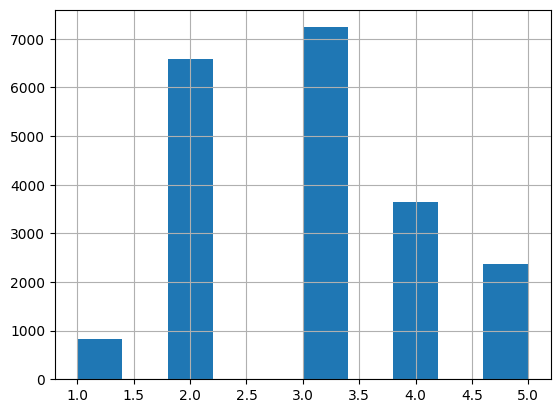

In [6]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
housing["income_cat"].value_counts()
housing["income_cat"].hist()

Check proportions are the same for the test set and full data set

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [8]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)
housing["income_cat"].value_counts() / len(housing)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

Compare against random proportions

In [12]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": split_data.income_cat_proportions(housing),
    "Stratified": split_data.income_cat_proportions(strat_test_set),
    "Random": split_data.income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674
